# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Load the Dataset

In [2]:
ESR = pd.read_csv('Epileptic Seizure Recognition.csv')

In [3]:
ESR.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


C:\Users\Mrida\anaconda3\envs\shan\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mrida\anaconda3\envs\shan\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


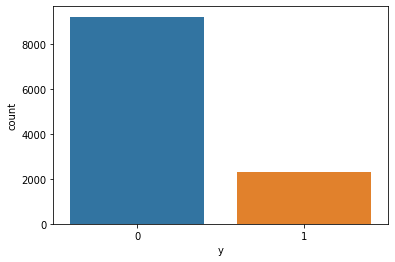

In [4]:
cols = ESR.columns
tgt = ESR.y
tgt[tgt>1]=0
ax = sn.countplot(tgt,label="Count")
non_seizure, seizure = tgt.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

In [5]:
ESR.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [6]:
ESR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [7]:
ESR.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,1.000000


In [8]:
X = ESR.iloc[:,1:179].values
X.shape

(11500, 178)

Text(0.5, 0, 'Samples')

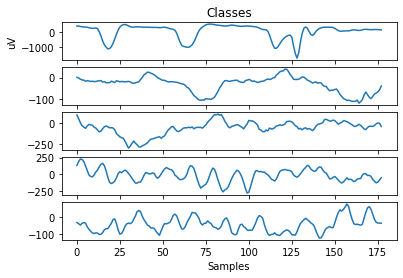

In [9]:
plt.subplot(511)
plt.plot(X[1,:])
plt.title('Classes')
plt.ylabel('uV')
plt.subplot(512)
plt.plot(X[7,:])
plt.subplot(513)
plt.plot(X[12,:])
plt.subplot(514)
plt.plot(X[0,:])
plt.subplot(515)
plt.plot(X[2,:])
plt.xlabel('Samples')

In [10]:
y = ESR.iloc[:,179].values
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

To make this a binary problem, let's turn the non-seizure classes 0 while maintaining the seizure as 1.

In [11]:
y[y>1]=0
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

##  Splitting the Dataset into the Training set and Test set


In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' %')
cr=classification_report(y_test,y_pred_log_reg)
print(cr)

82.49 %
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1849
           1       1.00      0.08      0.15       451

    accuracy                           0.82      2300
   macro avg       0.91      0.54      0.52      2300
weighted avg       0.85      0.82      0.75      2300



C:\Users\Mrida\anaconda3\envs\shan\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Linear SVM

In [16]:
from sklearn.svm import SVC, LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_linear_svc) + '%')
cr=classification_report(y_test,y_pred_log_reg)
print(cr)

82.16%
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1849
           1       1.00      0.08      0.15       451

    accuracy                           0.82      2300
   macro avg       0.91      0.54      0.52      2300
weighted avg       0.85      0.82      0.75      2300



C:\Users\Mrida\anaconda3\envs\shan\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [19]:
#Importing keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### LSTM

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset to check its contents
file_path = 'Epileptic Seizure Recognition.csv'
data = pd.read_csv(file_path)

# Display the first few rows and general information of the dataset
data_info = data.info()
data_head = data.head()
data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


(None,
       Unnamed   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  X171  \
 0  X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   -15   
 1  X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   150   
 2     X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57    64   
 3   X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   -81   
 4   X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4     2   
 
    X172  X173  X174  X175  X176  X177  X178  y  
 0   -31   -77  -103  -127  -116   -83   -51  4  
 1   146   152   157   156   154   143   129  1  
 2    48    19   -12   -30   -35   -35   -36  5  
 3   -80   -77   -85   -77   -72   -69   -65  5  
 4   -12   -32   -41   -65   -83   -89   -73  5  
 
 [5 rows x 180 columns])

In [ ]:

# Drop the 'Unnamed' column and check target distribution
data_cleaned = data.drop(columns=['Unnamed'])
target_column = 'y'

# Split features and target
X = data_cleaned.drop(columns=[target_column]).values
y = data_cleaned[target_column].values


In [ ]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert target to one-hot encoding
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

In [ ]:

# Reshape features for LSTM input (samples, timesteps, features)
# Assuming time-series data with 1 timestep per sample for now
X_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)


In [ ]:

# Define the LSTM model
model = Sequential([
    LSTM(128, input_shape=(1, 178), activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')  # Output layer for 5 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50
115/115 [==============================] - 0s 4ms/step - loss: 1.4083 - accuracy: 0.3796 - val_loss: 1.2154 - val_accuracy: 0.5071
Epoch 2/50
115/115 [==============================] - 0s 2ms/step - loss: 1.1232 - accuracy: 0.5231 - val_loss: 1.0120 - val_accuracy: 0.5571
Epoch 3/50
115/115 [==============================] - 0s 2ms/step - loss: 0.9613 - accuracy: 0.5678 - val_loss: 0.9031 - val_accuracy: 0.5891
Epoch 4/50
115/115 [==============================] - 0s 2ms/step - loss: 0.8707 - accuracy: 0.5981 - val_loss: 0.8457 - val_accuracy: 0.6147
Epoch 5/50
115/115 [==============================] - 0s 2ms/step - loss: 0.8159 - accuracy: 0.6235 - val_loss: 0.7986 - val_accuracy: 0.6348
Epoch 6/50
115/115 [==============================] - 0s 2ms/step - loss: 0.7643 - accuracy: 0.6432 - val_loss: 0.7984 - val_accuracy: 0.6500
Epoch 7/50
115/115 [==============================] - 0s 2ms/step - loss: 0.7312 - accuracy: 0.6606 - val_loss: 0.7829 - val_accuracy: 0.6489
Epoch 

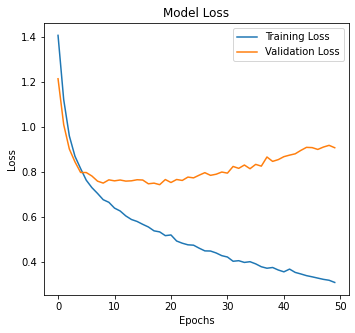

In [ ]:

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)



In [ ]:
# Plot training and validation metrics
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

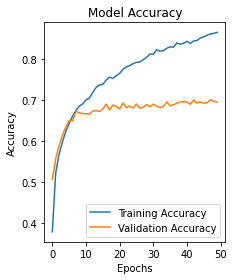

In [ ]:

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
test_loss, test_accuracy

(0.8390373587608337, 0.7056521773338318)